# 題目名稱：輔助電腦視覺判斷鋼琴演奏

#### 組員：
● R07522616 黃俊琪                                                   
● R07522630 賴雅晴

#### 題目簡介：
一般來說，如果僅僅使用電腦視覺判斷鋼琴演奏，只有辦法判斷當下演奏了哪個音，                   
沒辦法分辨是左手或是右手所彈奏的，就算加入了尋找手部特徵的方法，結果也並不穩定，                    
但如果加入NN等影像辨識方法，則可以大幅提高穩定度，達到辨認左右手所彈的音為何。                       
且在尋找琴鍵的部分，也可以透過NN的篩選後，直接針對邊界部分做尋邊，避免對整張圖大海撈針，加入一堆限制條件才可鎖定。  
且在錄影過程中，攝影機可能會因為鋼琴的音波而有些微的晃動，導致偏離的原本的位置，所以NN可以及時更新資訊。

------------------------------------------------------------------------------------------------
# 資料集：
從Youtube找到從鋼琴「正上方」拍攝的影片，並自己加上標籤，使用LabelImg軟體。
#####  https://github.com/tzutalin/labelImg
##### 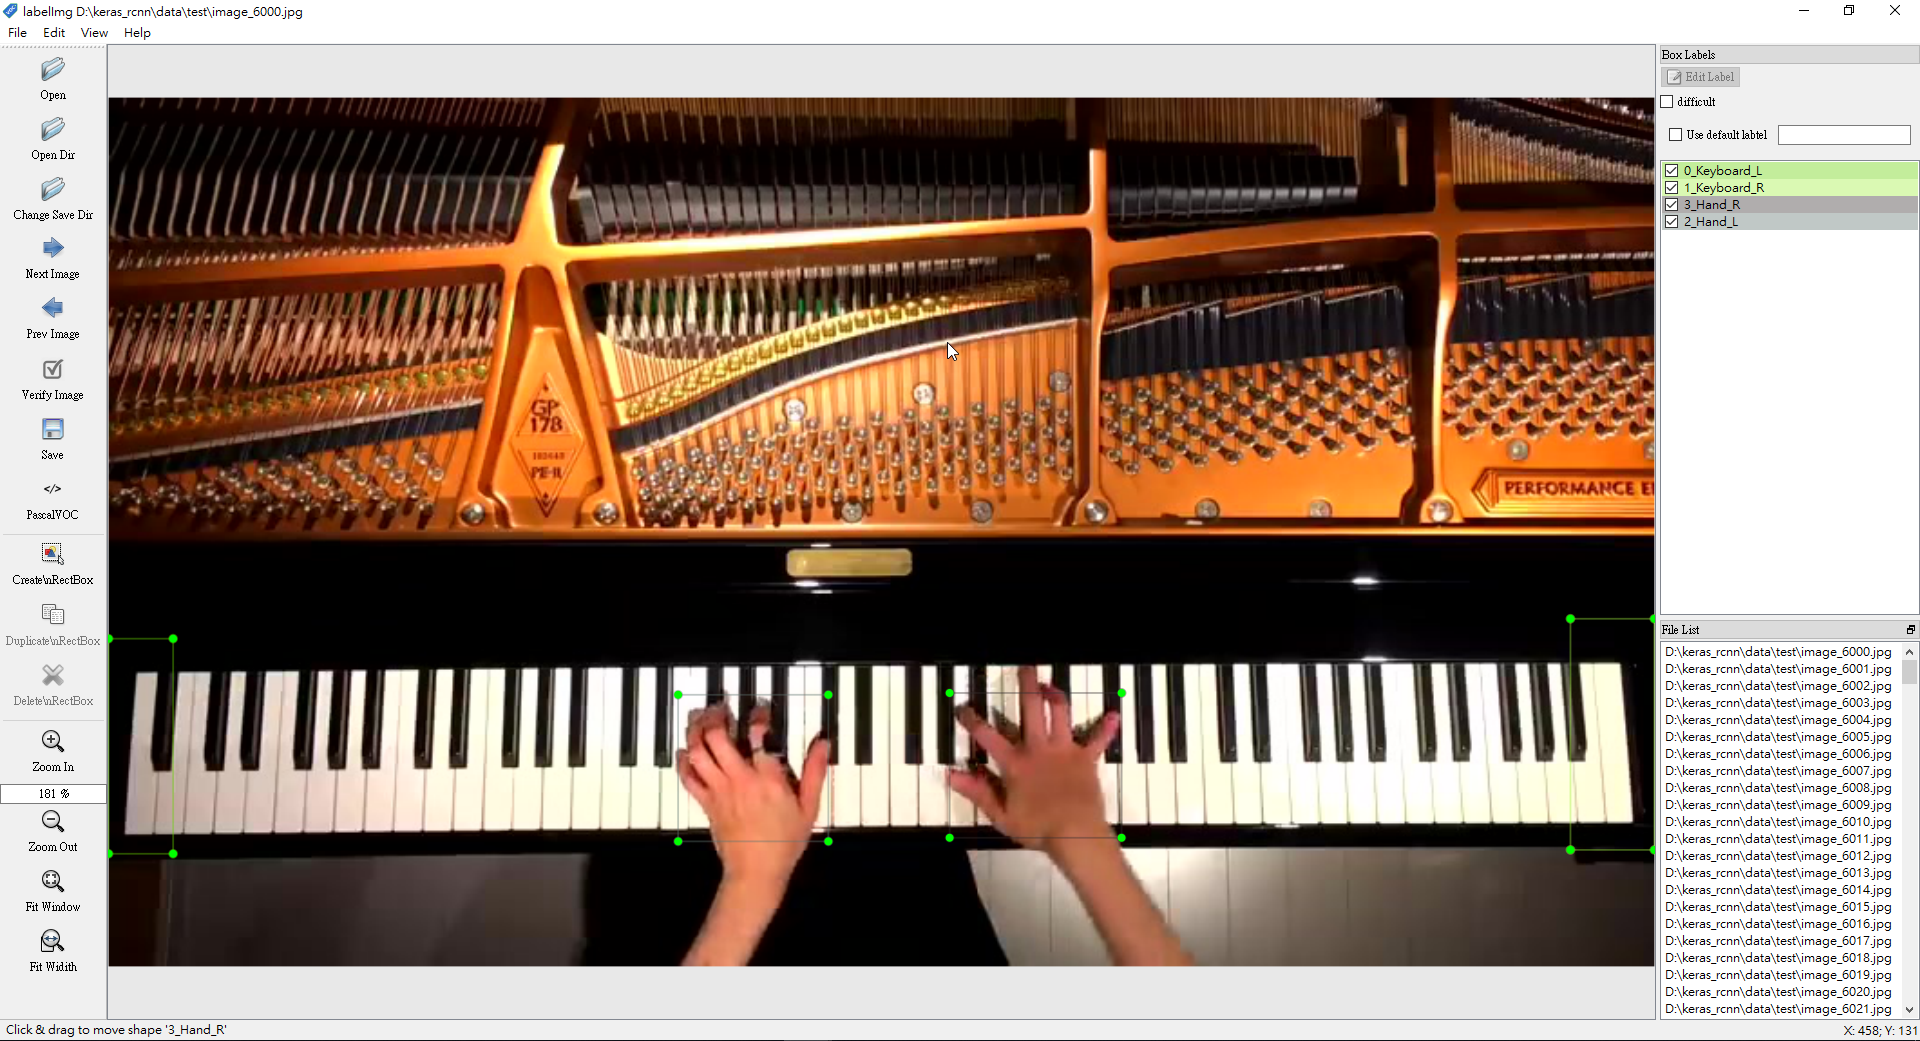

#### Input：這裡我加入4個類別，琴鍵的左、右邊界及左、右手，所以輸入是這四個類別的座標。
#### Output：是這四張圖的類別、機率及座標。

------------------------------------------------------------------------------------------------

# 結果處理：
 ●左、右手類別：是判斷出當前彈了什麼音後，將音分別紀錄給左右手。                         
 ●左、右邊界類別：是用來將影像中琴鍵的部分擷取出來，透過CNN的篩選後，可以直接針對邊界部分做尋邊，避免對整張圖大海撈針，加入一堆限制條件。
 

##### <左邊界 > 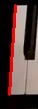
##### <右邊界> 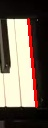




 ●鎖定邊界後，就可以對整張圖做投影，把琴鍵的部分拉直，並將琴鍵部分擷取出來做計算。
##### <原圖> 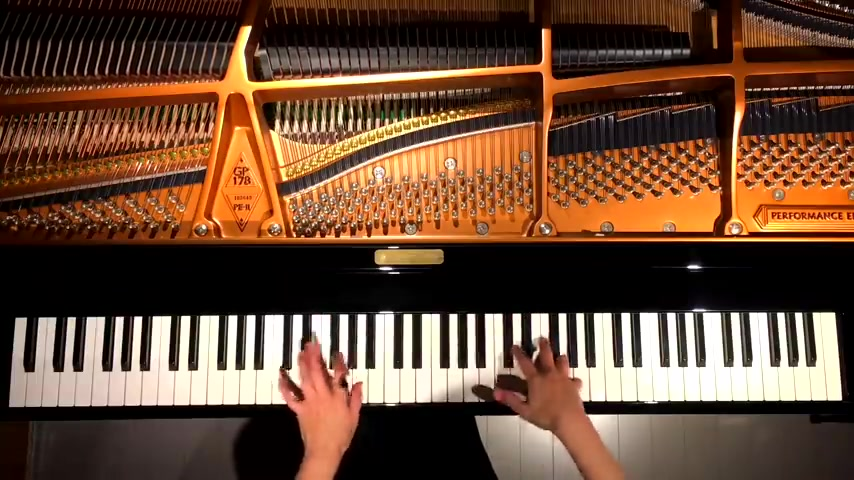
##### <投影圖>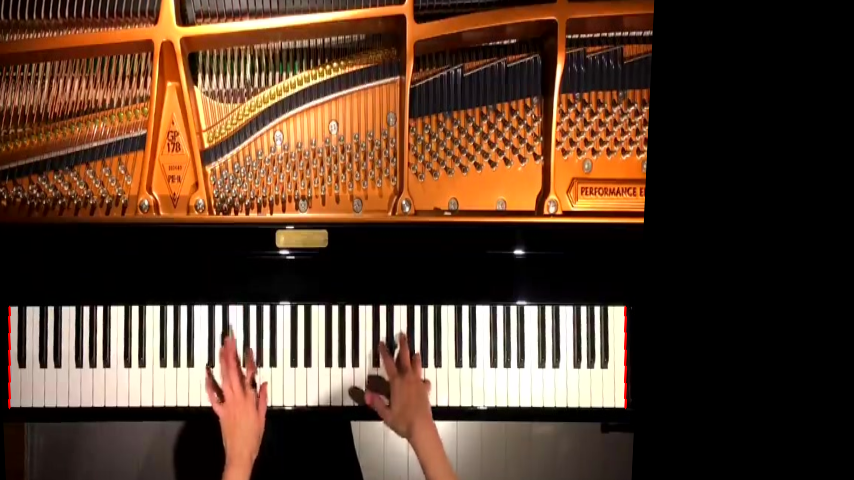
##### <琴鍵部分擷取> 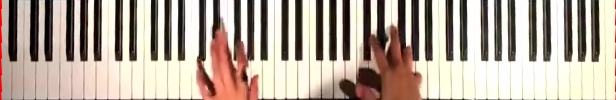

 ●之後將前後兩偵的差值影像做一系列處理取得琴鍵變化量，以此判斷哪個音被彈奏。

------------------------------------------------------------------------------------------------
# 遭遇難題：
因為是自己手動標標籤的，所以希望可以使用「最少的DATA」來達到「最好的效果」，                  
我們一開始是基於YOLO的單純CNN架構來做訓練，但訓練出來的結果非常的差，                   
因為YOLO是透過將影像resize到各種大小後，使用相同大小的kernal來判別物體，                         
而人的手會有多種細微動作，在少量的DATA下，幾乎無法辨識出來，YOLO應該是比較適用於判別「大物體」的方法。                                                                                                                                                                        
因此參考網路上對影像辨識的方法，我決定改成採用FRCNN(Fast R-CNN)來做基礎進行影像辨識，希望能夠改善結果。

------------------------------------------------------------------------------------------------
# 進度規劃
● Now ~ 5/24 資料前處理以完畢，原本採用YOLO訓練，效果不佳。改成採用FRCNN架構嘗試。                 
● 5/24 ~ 5/31 訓練模型並進行調整，以及後端影像處理。                                
● 5/31 ~ 6/2 改善模型並統整專案所遇到問題及解決方式。                              
● 6/2 ~ 6/5 撰寫期末專案所需文稿。                          

------------------------------------------------------------------------------------------------
# 目前進度：
    FRCNN架構模型訓練中......